# Introduction

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/git/https%3A%2F%2Fgitlab.in2p3.fr%2Fenergy4climate%2Fpublic%2Feducation%2Fmachine_learning_for_climate_and_energy/master?filepath=book%2Fnotebooks%2F01_introduction.ipynb)

<div class="alert alert-block alert-warning">
    <b>Prerequisites</b>
    
- Basics in linear algebra and calculus
- Basics in python

</div>

<div class="alert alert-block alert-info">
    <b>Learning Outcomes</b>
    
- Definitions: bias, variance, irreducible error, underfitting, overfitting, classification
- Data manipulation in python: numpy, matplotlib, pandas
- First steps with scikit-learn

</div>

## The IPCC report

<img alt="AR6" src="images/ar6_cover.jpeg" width=200 style="float:center">


The working group 1 (WG1) of the Intergovernmental Panel on Climate Change (IPCC) is a group of scientists who assess and quantify climate change. In order to provide an accurate description of the future climate, they use numerical models also known as Climate Model Intercomparison Project (CMIP).

- There are many components in a climate model: the main parts are the ocean and the atmosphere which predict the evolution of both media on predefined grid points. In order to get an accurate prediction of the CO2 concentration, one also need to have a proper model for living ecosystems and biogeochemical cycles. In polar regions there are specific models for ice sheets and sea ice.

- There are several scenarios (Shared Socioeconomic Pathways) ranging from very optimistic (SS1: sustainability) to (very) pessimistic (SS5: Fossil fuel development)

- In CMIP6, there are over 100 full blown models that attempt to propose the most reliable forecast for each of these scenarios [Balaji et. al (2018)](https://gmd.copernicus.org/articles/11/3659/2018/gmd-11-3659-2018.pdf)

Dealing with all model output is not a sinecure. Thousands of scientists collaborated to share their data, produce consistent diagnostics and plot an overview of what all these models are telling us. The main point of doing this is to **reduce the uncertainty**. It is indeed very important to know:
- how much of global warming has human origins (understand the climate system)
- if tipping points will be crossed in 2030 or 2050 in order to best anticipate the changes (do predictions).


<img alt="warming" src="images/warming_origin.png" width=800 style="float:center">

Figure SPM2 ([IPCC repport](https://www.ipcc.ch/report/ar6/wg1/downloads/report/IPCC_AR6_WGI_SPM.pdf))

> ***Question***
> - How much data was produced to construct this repport?

We will try to get a proxy for the amount of data produced with the number of pages in this report. Below is a plot with the number of pages for each Assesment Report (AR) between 1990 and 2013. I added the *[Charney Report (1979)](https://en.wikipedia.org/wiki/Jule_Gregory_Charney#Charney_Report)* which is considered a precursor to the IPCC reports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Text(0, 0.5, '# of pages')

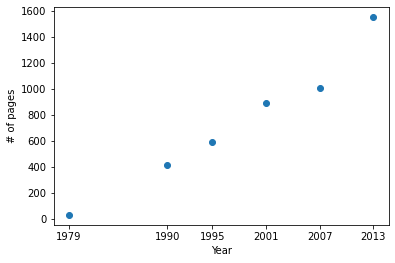

In [2]:
years = np.array([1979, 1990,1995,2001,2007,2013])
pages = np.array([30, 414, 588, 893, 1007, 1552])

plt.plot(years,pages,'o')

plt.xticks(years,years)
plt.xlabel("Year")
plt.ylabel("# of pages")

The number of pages is steadily increasing for each Assesment Report. This is consistent with the way global models evolved over time. This is also consistent with the increase of the spatial resolution: we have indeed more data to assess the regionality of climate change. Let's try to fit a linear model to see if we can predict the number of pages of the AR6 report (2021).

The idea of linear regression is that we suppose that there exist a linear relationship between the year of the Assesment Report and the number of pages

\begin{equation}
y = \alpha x + \beta\, ,
\end{equation}
with $y$ the number of pages and $x$ the year. $\alpha$ is called the **regression coefficient** and $\beta$ is called the **intercept**. In the next chapter, we are going to study linear regression and see how we can find $\alpha$ and $\beta$.

Although linear regression seem extremely simple, it is still regarded as the model of **maximum interpretability**. In fact, the sign and the magnitude of $\alpha$ tell you how $y$ varies with $x$ in an unambiguous way and you can easily confront this result to your physical intuition.

Latter on, we will study neural networks with millions of parameters which may give a better prediction for $y$ but it is often the case that we don't know why.

Needless to say that it is important to try **simple methods first** before going to more complicated algorithms... Even if simple models are sometimes [too simple](https://en.wikipedia.org/wiki/Anscombe%27s_quartet).

According to the linear fit, there should be 1741 pages in the AR6 report


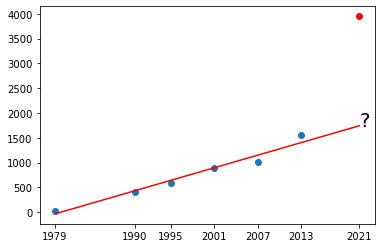

In [3]:

#linear regression with numpy
A = np.vstack([years, np.ones(len(years))]).T
m, c = np.linalg.lstsq(A, pages, rcond=None)[0]

plt.plot(years,pages,'o')

# add AR6 report
years = np.append(years, [2021])
pages = np.append(pages, [3949])

plt.plot(years, m*years + c, 'r', label='Fitted line')
plt.xticks(years,years)

plt.text(2021,m*2021 + c,"?", size=20)
plt.plot(years[-1],pages[-1],'or')
print("According to the linear fit, there should be {0:.0f} pages in the AR6 report".format(m*2021 + c))

In fact there are 3949 pages in AR6.
> ***Question***
> - What could have possibly gone wrong in our estimate of the number of pages for 2021?

In this problem we have one input variable (year) and one output variable (number of pages). Of course, there could have been more input variables to get a more accurate prediction.

> ***Question***
> - Propose several other input variables one could use to get a better estimate for the number of pages in the IPCC report.



Let us write the input variables with the letter $X$ and the output variable with the letter $Y$.
Moreover, there are multiple observations of each input variable. We will gather all the observations of all input variables in a matrix $\mathbf X$ with $n$ rows (for each observation) and $p$ columns (for each type of variable):

\begin{align}
 \mathbf{X} &= \begin{bmatrix}
    x_{11} & x_{12} & \cdots & x_{1p}\\
    x_{21} & x_{22} & \cdots & x_{2p}\\
    \vdots & \vdots &        & \vdots\\
    x_{n1} & x_{n2} & \cdots & x_{np}\\
  \end{bmatrix}
\end{align}

For now we restrict our analysis to problems where there is a single output variable.

> ***Question***
> - With this convention, is this output variable a row vector or a column vector?

In machine learning problems, the task is to propose an estimate of the function that predict the output variable based on the known input variables. This is based on our intuition that there *is* a relationship between the input and output variables in the form of

\begin{equation}
Y = f (X) + \epsilon\, ,
\end{equation}
with $f$ the function that we will try to guess and $\epsilon$ is an **Irreducible error** that can have multiple origins.

> ***Questions***
> - Give several sources of errors for the problem we are considering
> - If you consider enough input variables, can you get rid of $\epsilon$?

The above equation is the *ground truth*, however we usually don't know $f$. Our task is to propose an estimate of $f$ based on the sample observation that we have.  Because our observations are limited, we can only approximate $f$: we will denote this approximate function with a *hat* and write our prediction as

\begin{equation}
\hat Y = \hat f(X)
\end{equation}

Note that this equation is **deterministic**: there is no random noise in the right hand side. In fact, because we want to provide the best estimate, there is no need to add noise in the prediction: that would necessarily give a worse prediction for $Y$ (cf. next chapter)

We can then use $\hat f$ to
- make predictions
- understand the relationship between input and output variables

These two objectives are at the heart of machine learning techniques.

### Types of errors

<div class="alert alert-block alert-success">
    
The notion of prediction is key in machine learning. Consider the following example: suppose we want to understand the dynamics of the atmospheric boundary layer and more precisely characterize the amount of turbulence based as a function of height and mean wind field. We are going to set up a field campain and do measurements. At the observation site, we will we will place a couple of sensors at different heights, do measurements for a month and then go back to the lab and analyze the data. Based on this data set, we will propose a law

\begin{equation}
\hat T = \hat f(z,|u|)\, ,
\end{equation}
where $T$ is a scalar that indicates how turbulent the flow is. We can then use this function $\hat f$ to parameterize unresolved processes in climate model
    
</div>

> ***Question***
> 
> - How do we know that $\hat f$ is the correct fit? 
> - If we do a second field campain and take more measurements, will we get a new estimate for $\hat f$?
> - What if we use more precise instruments to do the measurements?


So the function $\hat f$ is not perfect. One way to quantify the uncertainty on $\hat f$ is to divide the data set in a ***training data set*** and a ***testing data set***. We use the training data set to compute $\hat f$ and with the help of a metric, we can give a score to that $\hat f$ to compute how well it performs to reproduce the output variable. Example of such metric is the squared error

\begin{equation}
L = E(Y-\hat Y)^2
\end{equation}

Then to validate the model, we compute the same score on the testing data set. If the score is the same than for the training data set, then the model is not specific to the training data set and can be generalized to more data. If the score is (significantly) higher, then that means the model is ***overfitting*** the data. In the exemple below, we propose to fit the data with the [Cubic Spline](https://en.wikipedia.org/wiki/Spline_(mathematics)). The score of the fit on the traning data is excellent because the error on each point is zero. However, we have a feel that the model will perform poorly on the testing data: it is overfitting the data. We will prove this in the next chapter. 

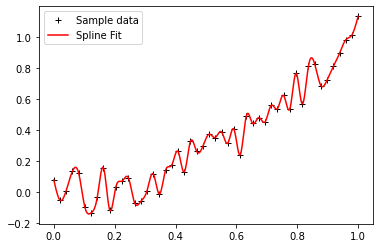

In [6]:
from scipy.interpolate import CubicSpline
nx = 50

x = np.linspace(0,1,nx)
y = x**2 + 0.3*(np.random.rand(nx) - 0.5)

cs = CubicSpline(x,y,bc_type='natural')

xp = np.linspace(0,1,500)

plt.figure()
plt.plot(x,y,'k+', label='Sample data')
plt.plot(xp, cs(xp), 'r', label='Spline Fit')

plt.legend()


To measure how much the model is overfitting the data we introduce the ***Variance error***: a model with high variance is overfitting the data.

On the other hand, if the model we are trying to fit does not have enough degrees of freedom, there is a risk that we are ***underfitting*** the data, which is characterized by the ***Bias error***. We say a model is biased when it is not able to capture the correct relationship between features and target output. In the exemple below, we are trying to fit a constant where the relationship betwenn the input and output variables is in fact quadratic. The model is biased because there will always be an offset in the prediction of the output variable.


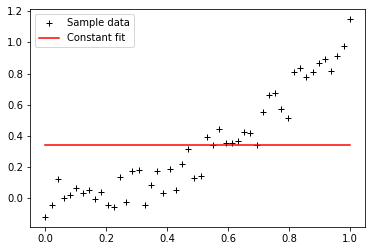

In [5]:
nx = 50

x = np.linspace(0,1,nx)
y = x**2 + 0.3*(np.random.rand(nx) - 0.5)

y_me = np.mean(y)

plt.figure()
plt.plot(x,y,'k+', label='Sample data')
plt.plot(x, 0*x + y_me, 'r', label='Constant fit')
plt.legend()

The last type of error we are going to deal with is the ***Irreducible error***. This error corresponds to the random numbers that we added in the example above. You may see this error as the precision of your instrument or as missing physics in your model. This can be due to chaotic perturbation of your system. This type of error is not predictable.

<div class="alert alert-block alert-info">
    <b>Summary</b>
    
- There are 3 types of errors: Bias, Variance and Irreducible errors. Our goal will be to find model that have both the lowest bias and lowest variance.
</div>

## Introduction to classification

Weather, clouds, seasons, wind, hurricane... Categories and classifications are everywhere in environmental sciences. They can be articifially created based on thresholds (as in the hurricane exemple below) or they can correspond to trully **discrete variable** (e.g. "It's raining, it's not raining").


<img alt="saphir" src="images/saphir_scale.png" width=400 style="float:center">


To use proper terminology, we say that categorical variables are **qualitative** (can be described with words) whereas variables that reflect a notion of magnitude are **quantitative** (can be measured).

In the exemple above, you can describe with words what a hurricane of category 3 is. However, you cannot describe what a wind of 100 km/h is.

### Bayes decision boundary

Consider the following problem: we want to propose a classification rain/no rain that is function of the pressure predictor. From our observations, we have an estimate of the [probability density function](https://en.wikipedia.org/wiki/Probability_density_function) of pressure for the rainy days and dry days. We plot these pdfs in blue (rain) and in red (no rain) in next figure.

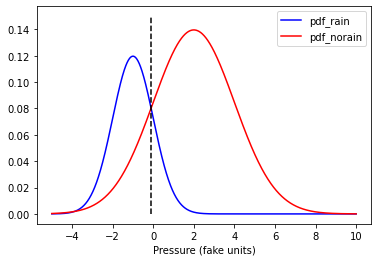

In [6]:
# figure inspired from https://www.astroml.org/book_figures/chapter9/fig_bayes_DB.html
def gaussian(x, mu, sigma):
  return 1/(np.sqrt(2*np.pi)*sigma)*np.exp(-((x - mu)/sigma)**2/2)

pressure = np.linspace(-5,10,1000) # pressure distribution (fake units)

p_rain = 0.3  # probability that it is raining
p_norain = 1 - p_rain # probability that it is not raining

pdf_rain   = p_rain*gaussian(pressure,-1,1)
pdf_norain = p_norain*gaussian(pressure,2,2)

pressure_bayes = pressure[np.where(pdf_rain > pdf_norain)][-1]

plt.plot(pressure,pdf_rain, 'b', label='pdf_rain')
plt.plot(pressure,pdf_norain, 'r', label='pdf_norain')
plt.plot([pressure_bayes, pressure_bayes], [0,0.15], 'k--')

plt.xlabel('Pressure (fake units)')
plt.legend()

In this figure, we see that when $Pressure < 0$, it is more likely to be raining and when $Pressure > 0$, it is more likely to be a sunny day. The threshold $Pressure = 0$ is called the **Bayes decision boundary**. It correspond to the pressure $p_0$ such that

\begin{equation}
P(r = 1|pressure = p_0) = P(r = 0|pressure = p_0)\, ,
\end{equation}
with $r$ a variable that is 1 when it is raining and 0 otherwise.

The Bayes classifier proposes to assign to the category $r=1$ all days for which $Pressure < p_0$ and to $r=0$ all the other days.

Note however that all days for which $Pressure < p_0$ are not necessarily rainy days we will make errors if we adopt this classification because as we have seen in the figure above, there are sunny days for which $Pressure < p_0$. We can measure the error by computing

\begin{equation}
L = \sum_{i} \delta(r_i \ne \hat r_i)\, ,
\end{equation}
where the sum is over all our observations, $\hat r_i$ is our predicted value of the rain, and $\delta(r_i \ne \hat r_i)$ is a function that equals 1 for misclassified data and 0 otherwise.

**The Bayes classifier is the classifier that minimizes the error $L$.**

... However, to compute the Bayes classifier, we need to know the *true* pdf of the occurence of our categories.

<div class="alert alert-block alert-info">
    <b>Definitions</b>
    
- [**Supervised learning**](https://en.wikipedia.org/wiki/Supervised_learning) is the machine learning task of learning a function that maps an input to an output based on example input-output pairs (labelled data set). The key aspect of supervised learning is that there exists a training data set with labelled data.
- on the other hand, [**Unsupervised learning**](https://en.wikipedia.org/wiki/Unsupervised_learning) corresponds to the problem of guessing patterns in an unlabelled data set

</div>

***
## Credit

[//]: # "This notebook is part of [E4C Interdisciplinary Center - Education](https://gitlab.in2p3.fr/energy4climate/public/education)."
Contributors include Bruno Deremble and Alexis Tantet.

<br>

<div style="display: flex; height: 70px">
    
<img alt="Logo LMD" src="images/logos/logo_lmd.jpg" style="display: inline-block"/>

<img alt="Logo IPSL" src="images/logos/logo_ipsl.png" style="display: inline-block"/>

<img alt="Logo E4C" src="images/logos/logo_e4c_final.png" style="display: inline-block"/>

<img alt="Logo EP" src="images/logos/logo_ep.png" style="display: inline-block"/>

<img alt="Logo SU" src="images/logos/logo_su.png" style="display: inline-block"/>

<img alt="Logo ENS" src="images/logos/logo_ens.jpg" style="display: inline-block"/>

<img alt="Logo CNRS" src="images/logos/logo_cnrs.png" style="display: inline-block"/>
    
</div>

<hr>

<div style="display: flex">
    <a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/"><img alt="Creative Commons License" style="border-width:0; margin-right: 10px" src="https://i.creativecommons.org/l/by-sa/4.0/88x31.png" /></a>
    <br>This work is licensed under a &nbsp; <a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/">Creative Commons Attribution-ShareAlike 4.0 International License</a>.
</div>